In [15]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [3]:
student_data=pd.read_csv(r'Student_Performance.csv')

In [5]:
student_data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [7]:
student_data['Extracurricular Activities']=student_data['Extracurricular Activities'].map({'Yes':1,'No':0})

In [8]:
student_data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [11]:
student_data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

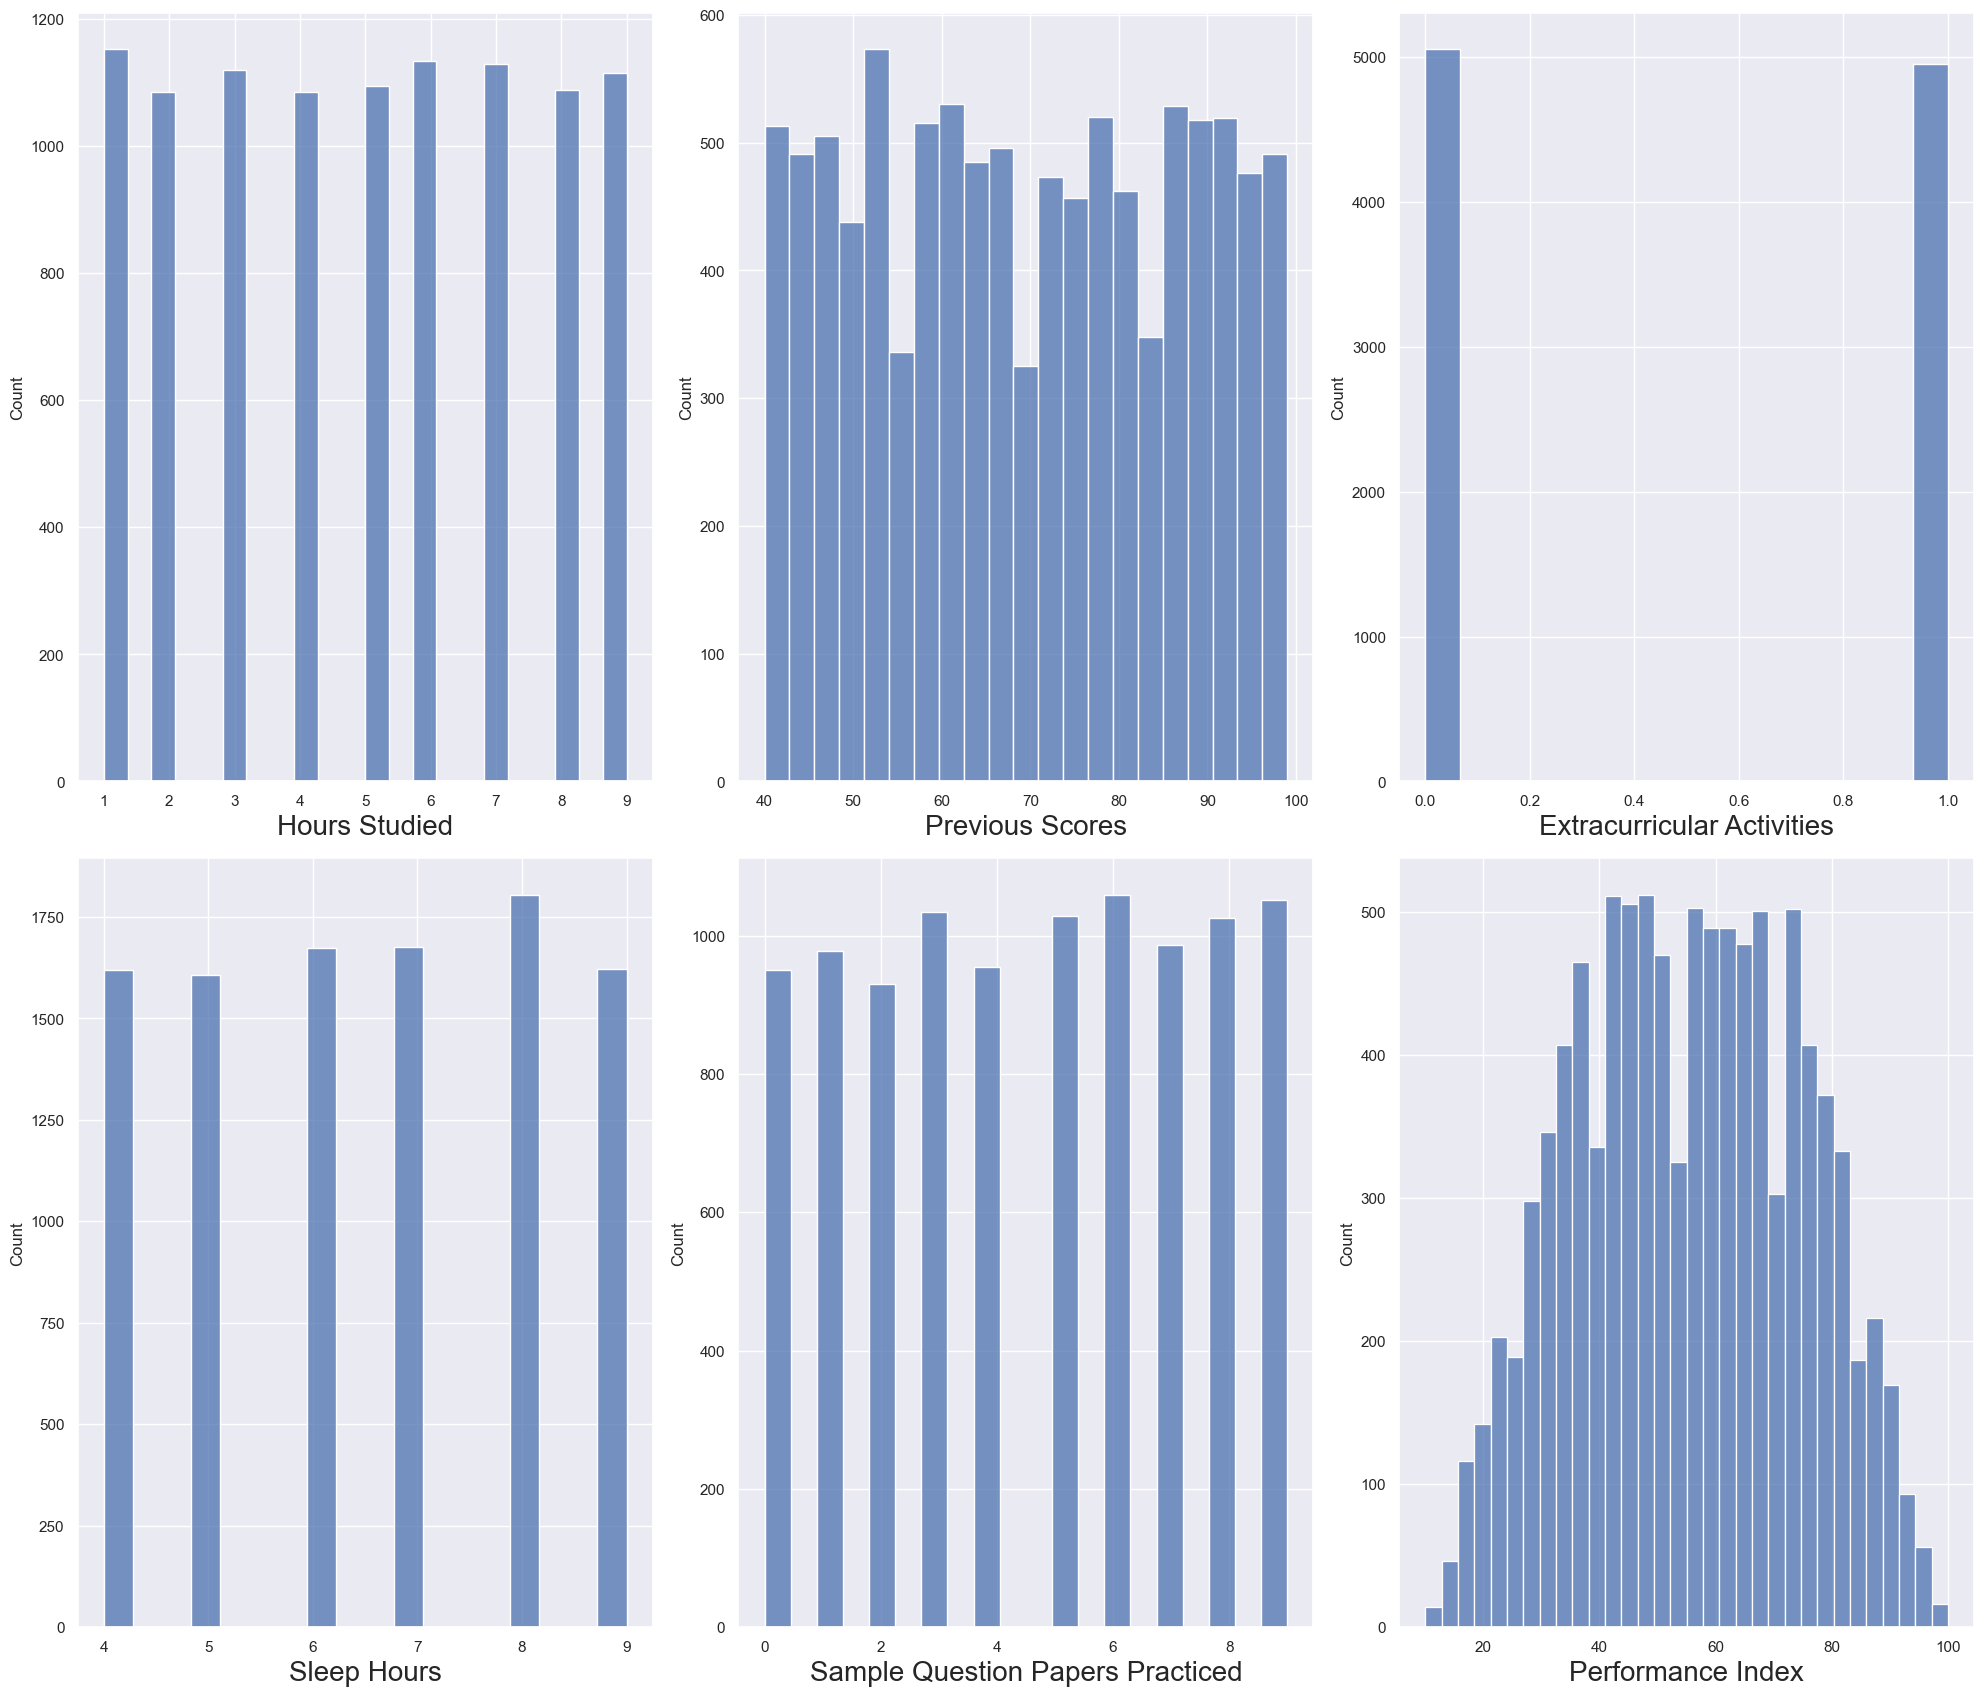

In [18]:
# let's see how data is distributed for every column

plt.figure(figsize=(20,25))
plotnumber=1

for column in student_data:
    if plotnumber<=6:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(student_data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()


Looks all are equally distributed, no any skeweness finded in the dataset

In [19]:
y = student_data['Performance Index']
X =student_data.drop(columns = ['Performance Index'])

In [20]:
X

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5
...,...,...,...,...,...
9995,1,49,1,4,2
9996,7,64,1,8,5
9997,6,83,1,8,5
9998,9,97,1,7,0


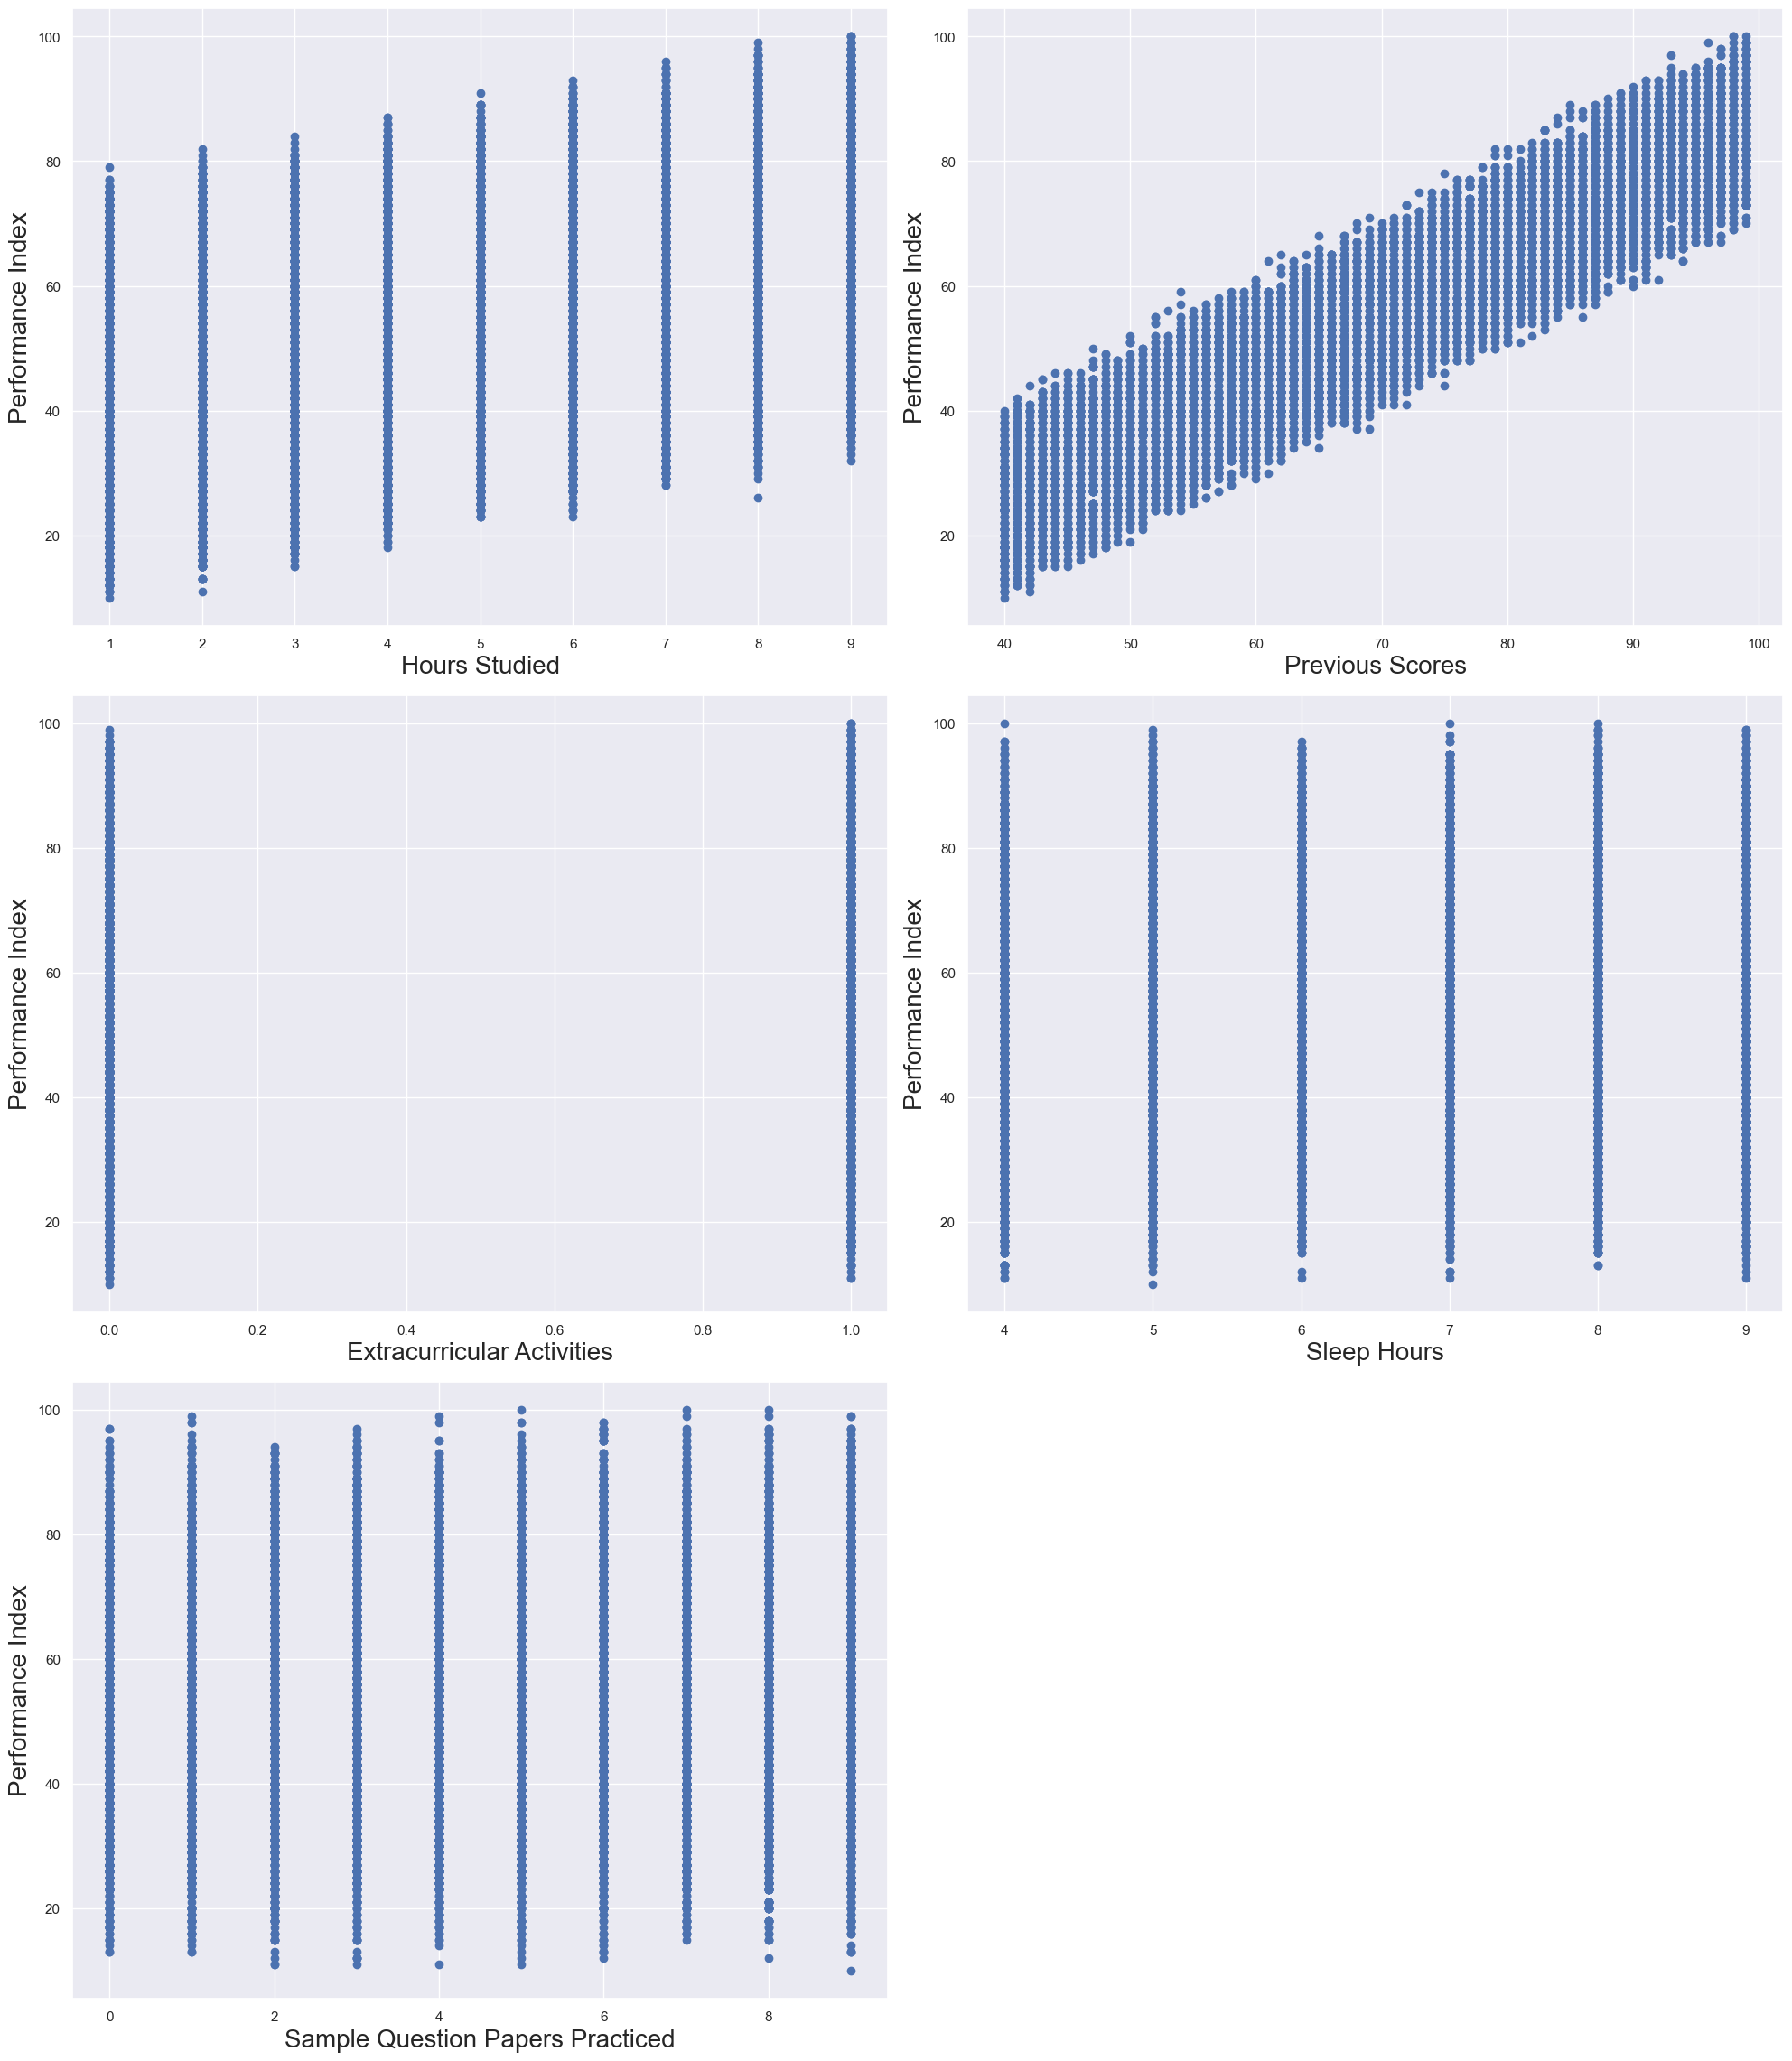

In [21]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=8 :
        ax = plt.subplot(4,2,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Performance Index',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [25]:
scaler=StandardScaler()

X_scaled=scaler.fit_transform(X)

In [27]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=1)

In [29]:
y_train.head()

651     60.0
6560    90.0
8974    79.0
2348    63.0
5670    45.0
Name: Performance Index, dtype: float64

In [30]:
regression_model=LinearRegression()

regression_model.fit(x_train,y_train)

LinearRegression()

In [32]:
print ('Coefficient =', regression_model.coef_)
print ('Intercept =',regression_model.intercept_)

Coefficient = [ 7.39206478 17.66160985  0.29960156  0.81484737  0.54669965]
Intercept = 55.247505854885006


In [33]:
regression_model.score(x_train,y_train)  # Adj R2

0.9888743032466624